## Sample from a feature distribution (mimicking GC content, the length of a genomic interval, etc)

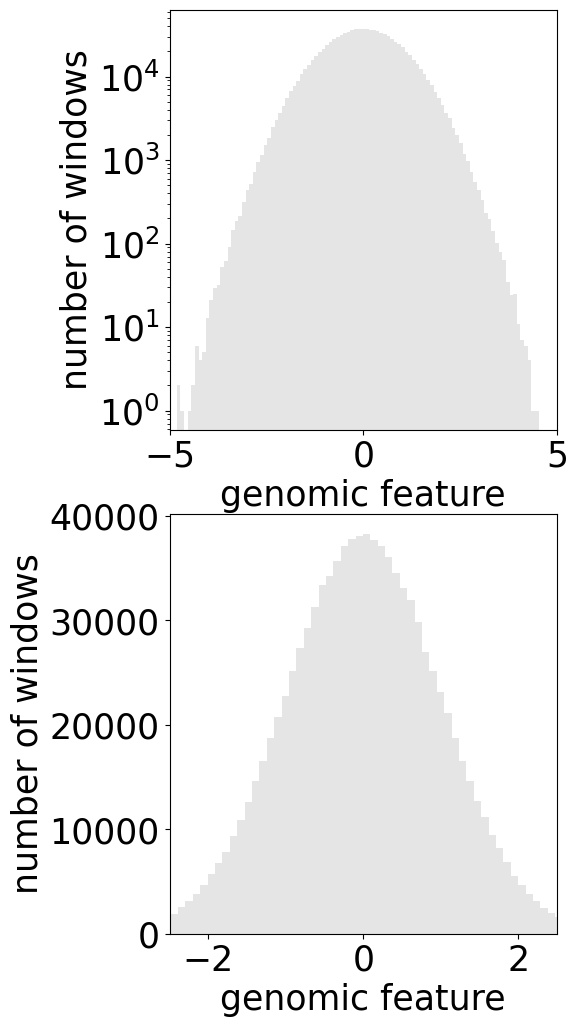

In [1]:
import matplotlib.pyplot as plt

from generate_data import plot_xs 

plt.rcParams.update({'font.size': 25})

NUMBER_EXAMPLES = 1000000 # Number of intervals

def plot_xs_wrapper():
    fig, axes = plt.subplots(2, 1, figsize=(5, 12))
    plot_xs(axes[0], NUMBER_EXAMPLES)
    plot_xs(axes[1], NUMBER_EXAMPLES, xlim=(-2.5, 2.5), yscale='linear')

plot_xs_wrapper()

## True mapping from feature to target (mimicking SNV counts)

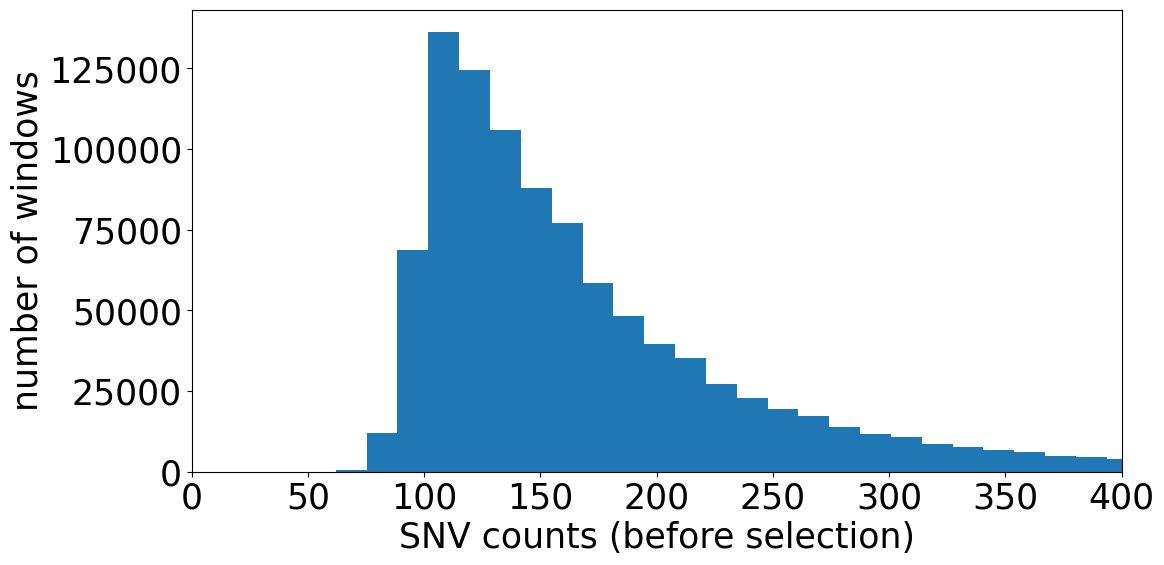

In [2]:
from generate_data import compute_true_params, plot_ys

# parameters of true model 
TRUE_PARAMS = compute_true_params(
    A = 5,
    B = 0.4,
    C = 0.1,
) 

plot_ys(TRUE_PARAMS, NUMBER_EXAMPLES)

## Introduce selection into a small fraction of examples

,x,y,constrained
0,0.976175,199.412131,True
1,0.941197,202.214275,True
2,-0.107743,129.734392,True
3,-0.905660,104.591722,True
4,-0.884794,99.957225,True
...,...,...,...
999995,0.420816,186.000000,False
999996,0.480892,196.000000,False
999997,-0.216383,131.000000,False
999998,1.618995,358.000000,False


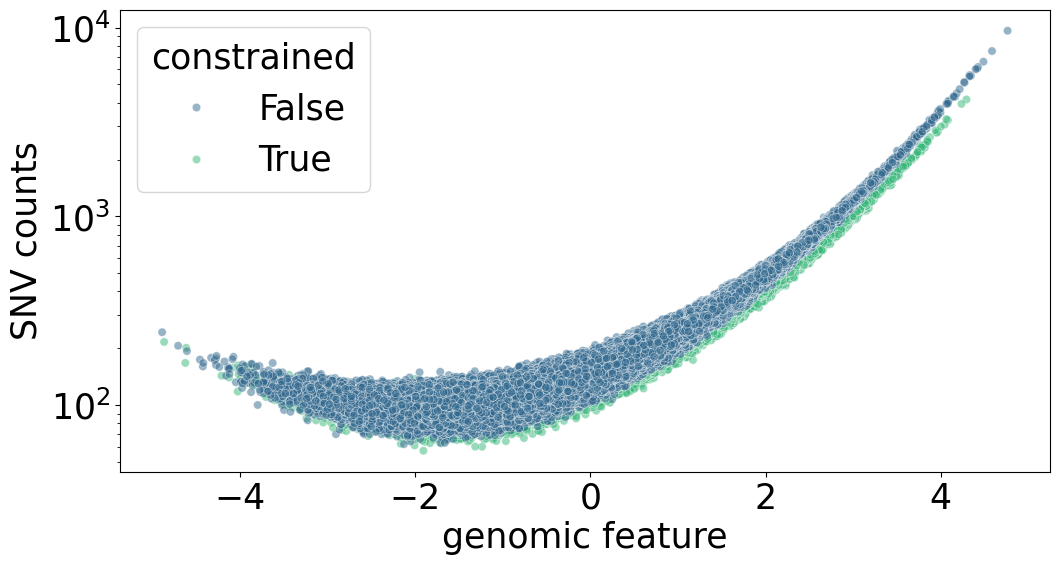

In [3]:
from generate_data import generate_xs_ys_with_selection, compute_y_pos_2

POSITIVE_FRACTION = 0.3 # informed by experiment

DATA = generate_xs_ys_with_selection(TRUE_PARAMS, NUMBER_EXAMPLES, POSITIVE_FRACTION, compute_y_pos_2)
DATA

## Fit neutral models

constant model of lambda:
alpha: 5.21 (A: 5)



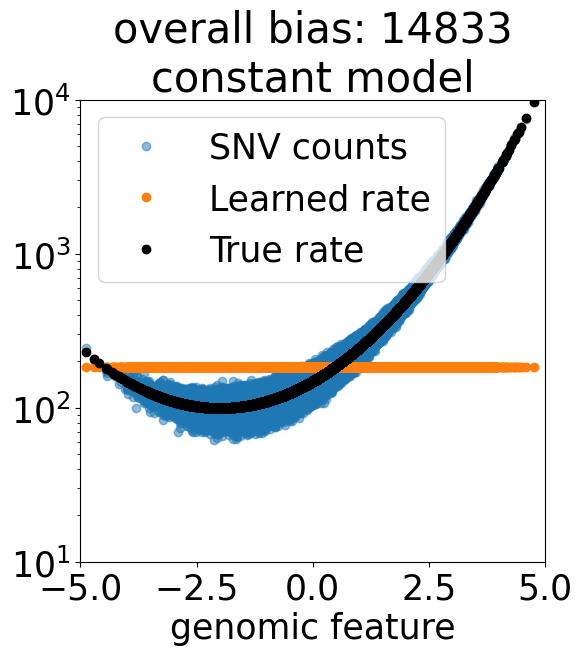

linear model of lambda:
alpha: 5.09 (A: 5)
beta: 0.50 (B: 0.4)



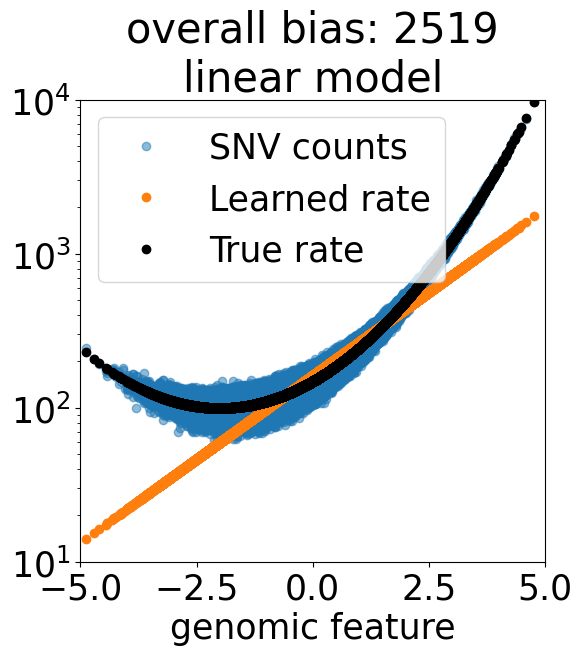

quadratic model of lambda:
alpha: 5.00 (A: 5)
beta: 0.40 (B: 0.4)
gamma: 0.10 (C: 0.1)



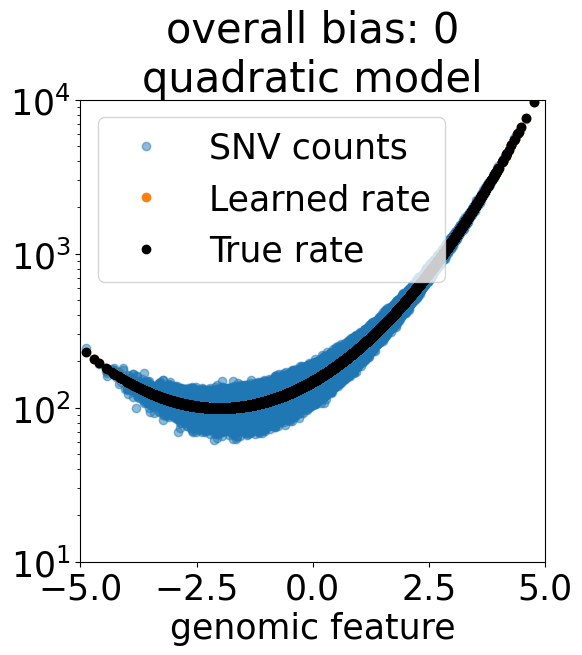

,x,y,constrained,predicted_y_constantModel,residuals_constantModel,standardized_residuals_constantModel,predicted_y_linearModel,residuals_linearModel,standardized_residuals_linearModel,x2,predicted_y_quadraticModel,residuals_quadraticModel,standardized_residuals_quadraticModel
0,0.976175,199.412131,True,183.397203,-16.014928,-1.182575,263.713511,64.301380,3.959625,0.952917,241.225124,41.812993,2.692155
1,0.941197,202.214275,True,183.397203,-18.817073,-1.389491,259.141600,56.927325,3.536325,0.885852,236.283967,34.069691,2.216415
2,-0.107743,129.734392,True,183.397203,53.662811,3.962571,153.378750,23.644358,1.909171,0.011609,142.329133,12.594741,1.055704
3,-0.905660,104.591722,True,183.397203,78.805480,5.819157,102.920409,-1.671314,-0.164743,0.820220,112.168942,7.577219,0.715441
4,-0.884794,99.957225,True,183.397203,83.439978,6.161378,103.999805,4.042580,0.396408,0.782860,112.686684,12.729459,1.199150
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0.420816,186.000000,False,183.397203,-2.602797,-0.192196,199.774071,13.774071,0.974524,0.177086,178.759771,-7.240229,-0.541524
999996,0.480892,196.000000,False,183.397203,-12.602797,-0.930616,205.865813,9.865813,0.687608,0.231257,184.100942,-11.899058,-0.876970
999997,-0.216383,131.000000,False,183.397203,52.397203,3.869116,145.269545,14.269545,1.183921,0.046821,136.759811,5.759811,0.492526
999998,1.618995,358.000000,False,183.397203,-174.602797,-12.893026,363.678482,5.678482,0.297765,2.621146,368.589172,10.589172,0.551557


In [4]:
from fit_neutral_models import fit_poisson_model_wrapper

MODEL_TYPES = ['constant', 'linear', 'quadratic'] 

DATA = fit_poisson_model_wrapper(DATA, MODEL_TYPES, TRUE_PARAMS)
DATA

## Residuals are biased when models are misspecified 

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

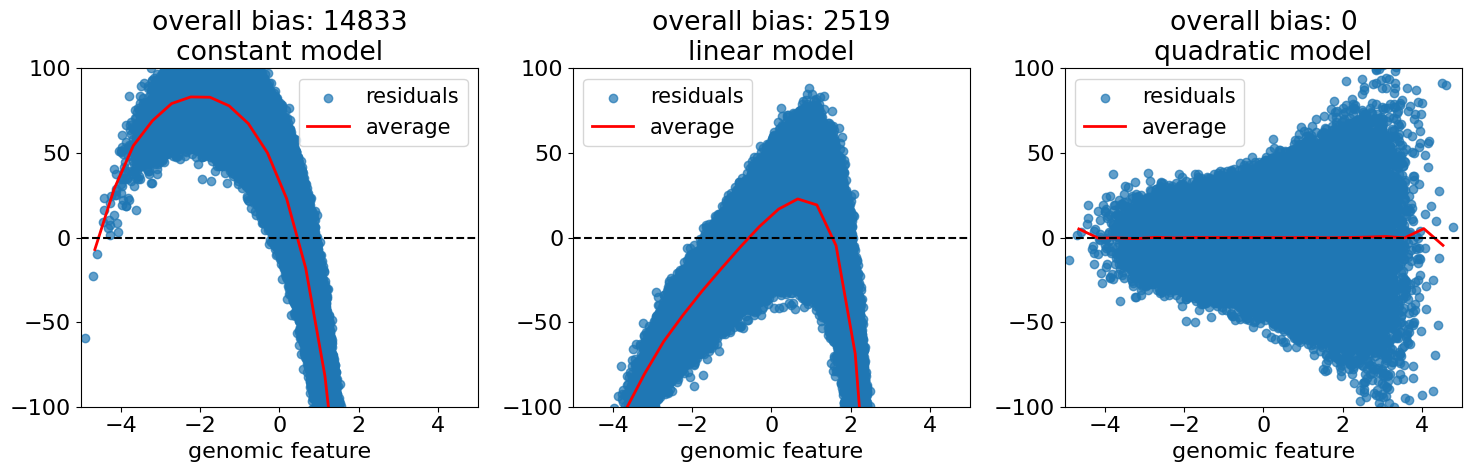

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_residual = df.groupby('x_bin_midpoints')[residual_label].mean()
/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/plot_residuals.py:

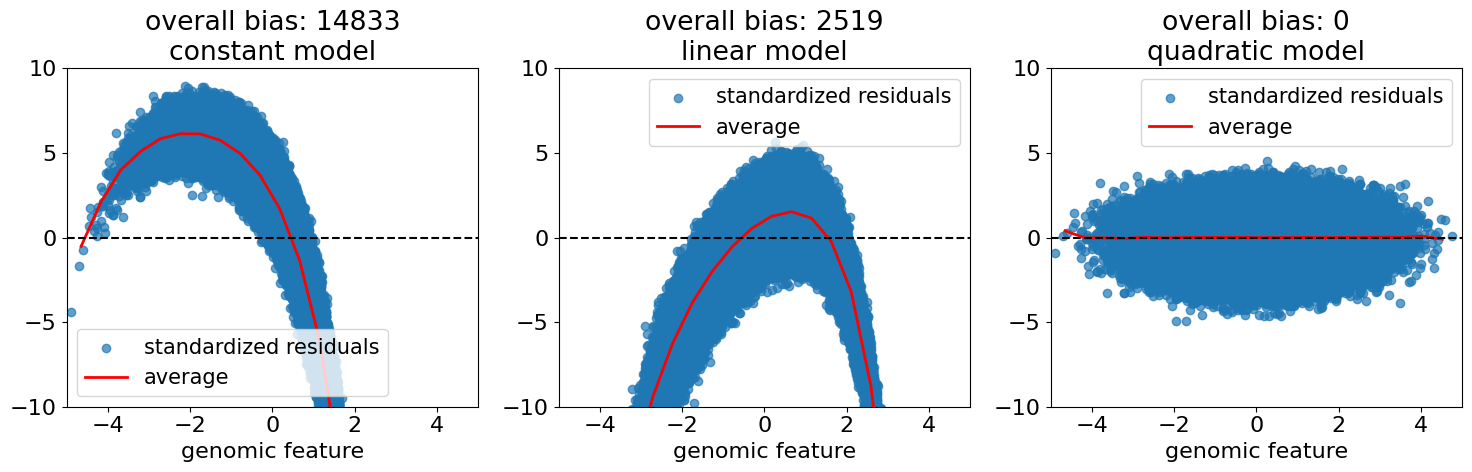

In [5]:
from plot_residuals import plot_residuals_vs_feature_all_models

plt.rcParams.update({'font.size': 16})

plot_residuals_vs_feature_all_models(DATA, standardized=False, model_types=MODEL_TYPES, true_params=TRUE_PARAMS)
plot_residuals_vs_feature_all_models(DATA, standardized=True, model_types=MODEL_TYPES, true_params=TRUE_PARAMS)

## Stratify neutral models' performances by x

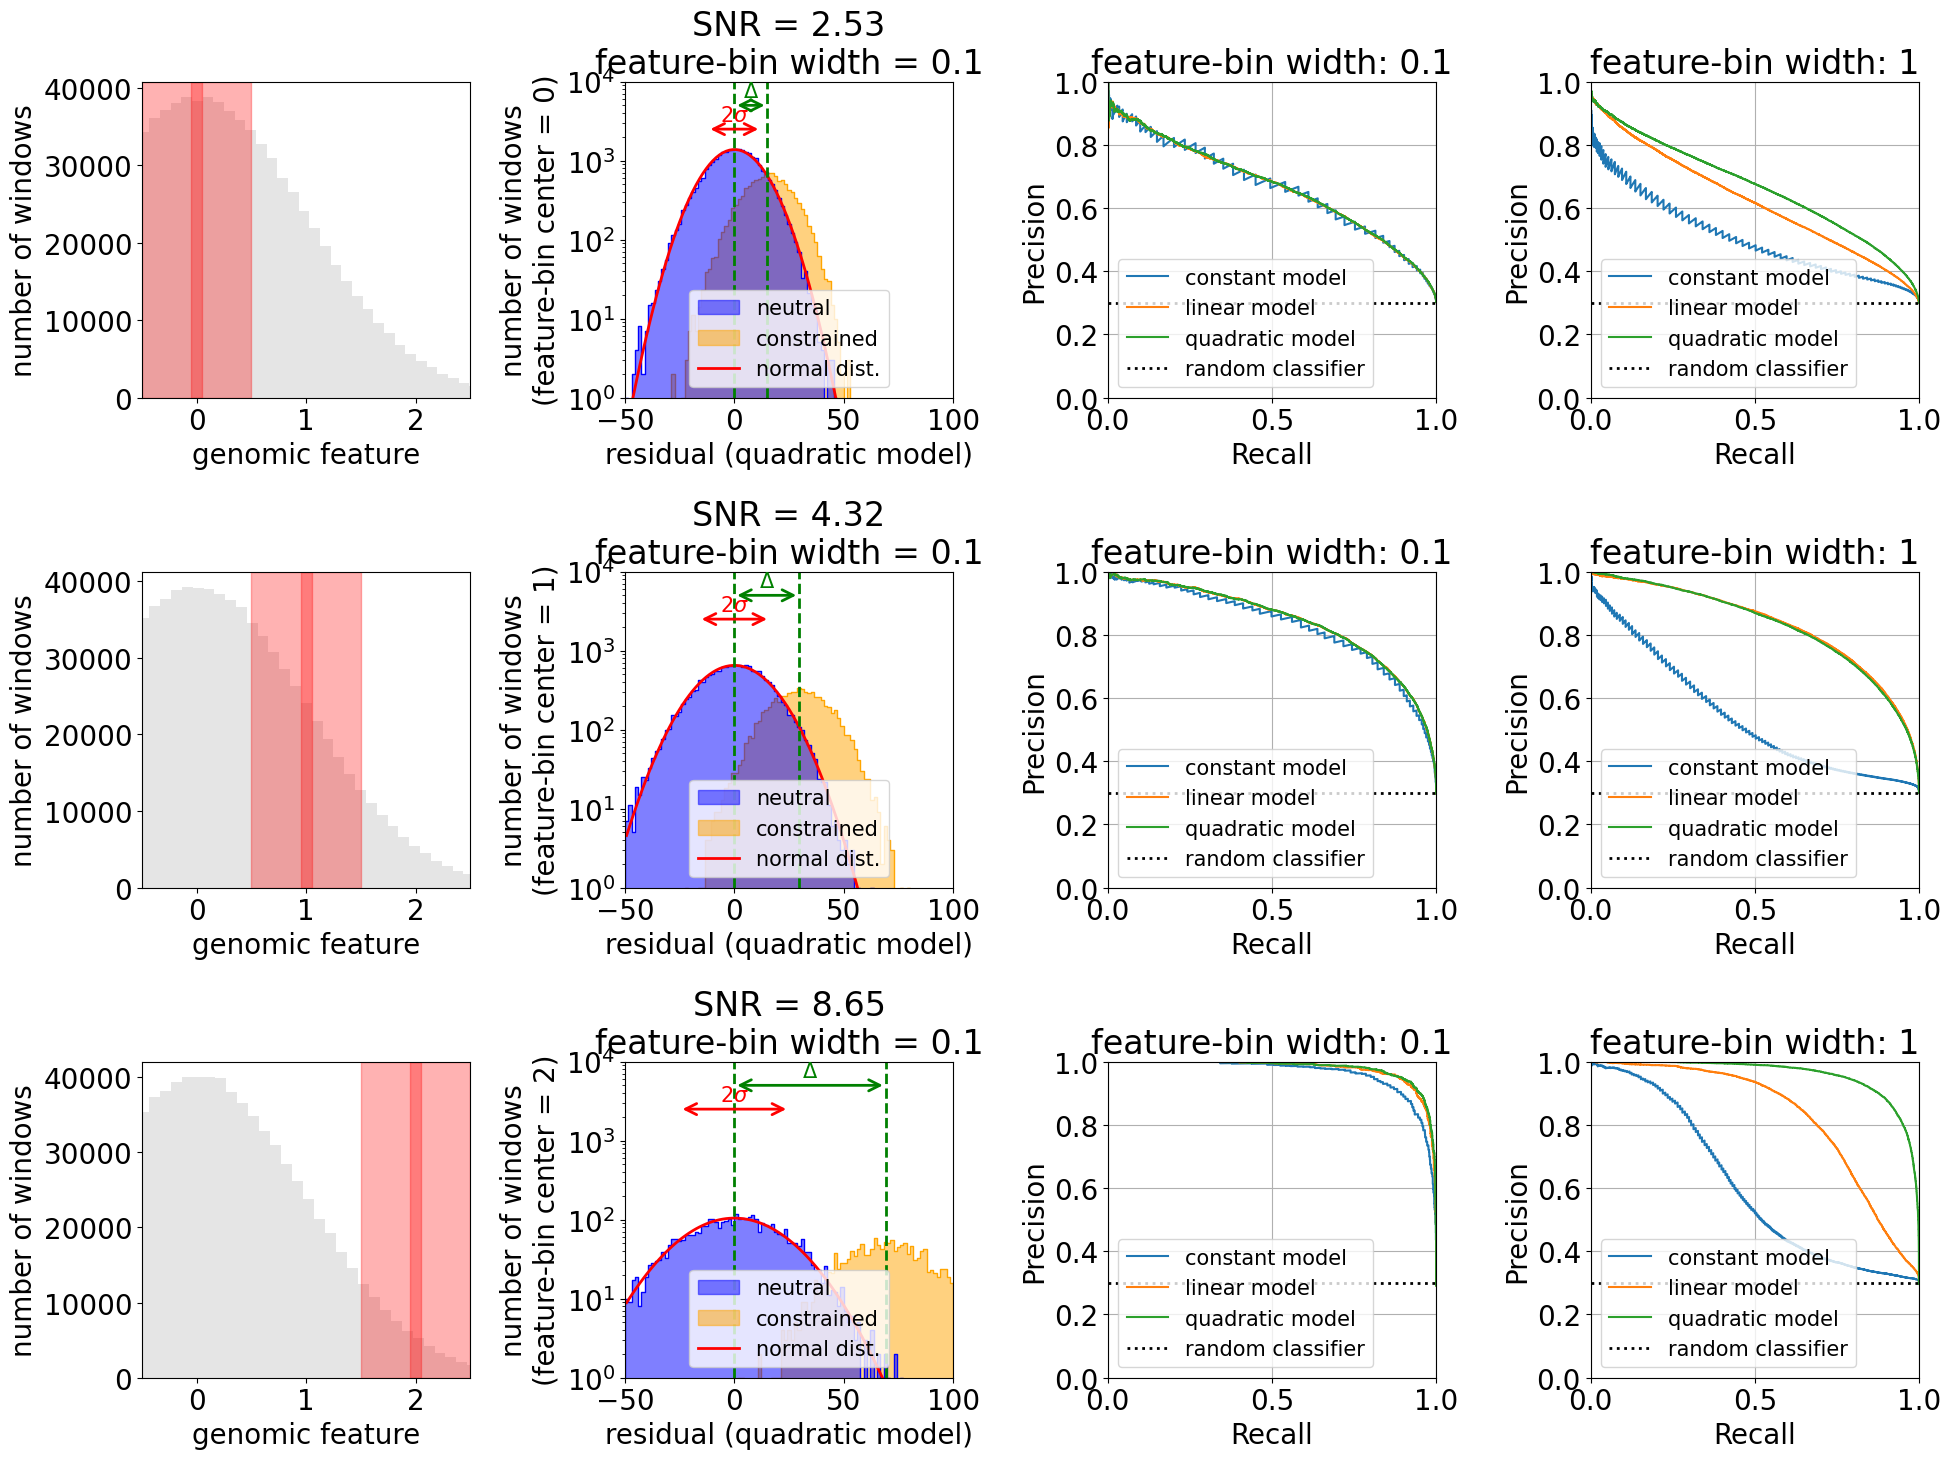

In [6]:
from predict_constraint import plot_pr_curve_wrapper

plt.rcParams.update({'font.size': 20})

plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-50, 100), ylim_residual=(1, 1e4), standardized=False, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

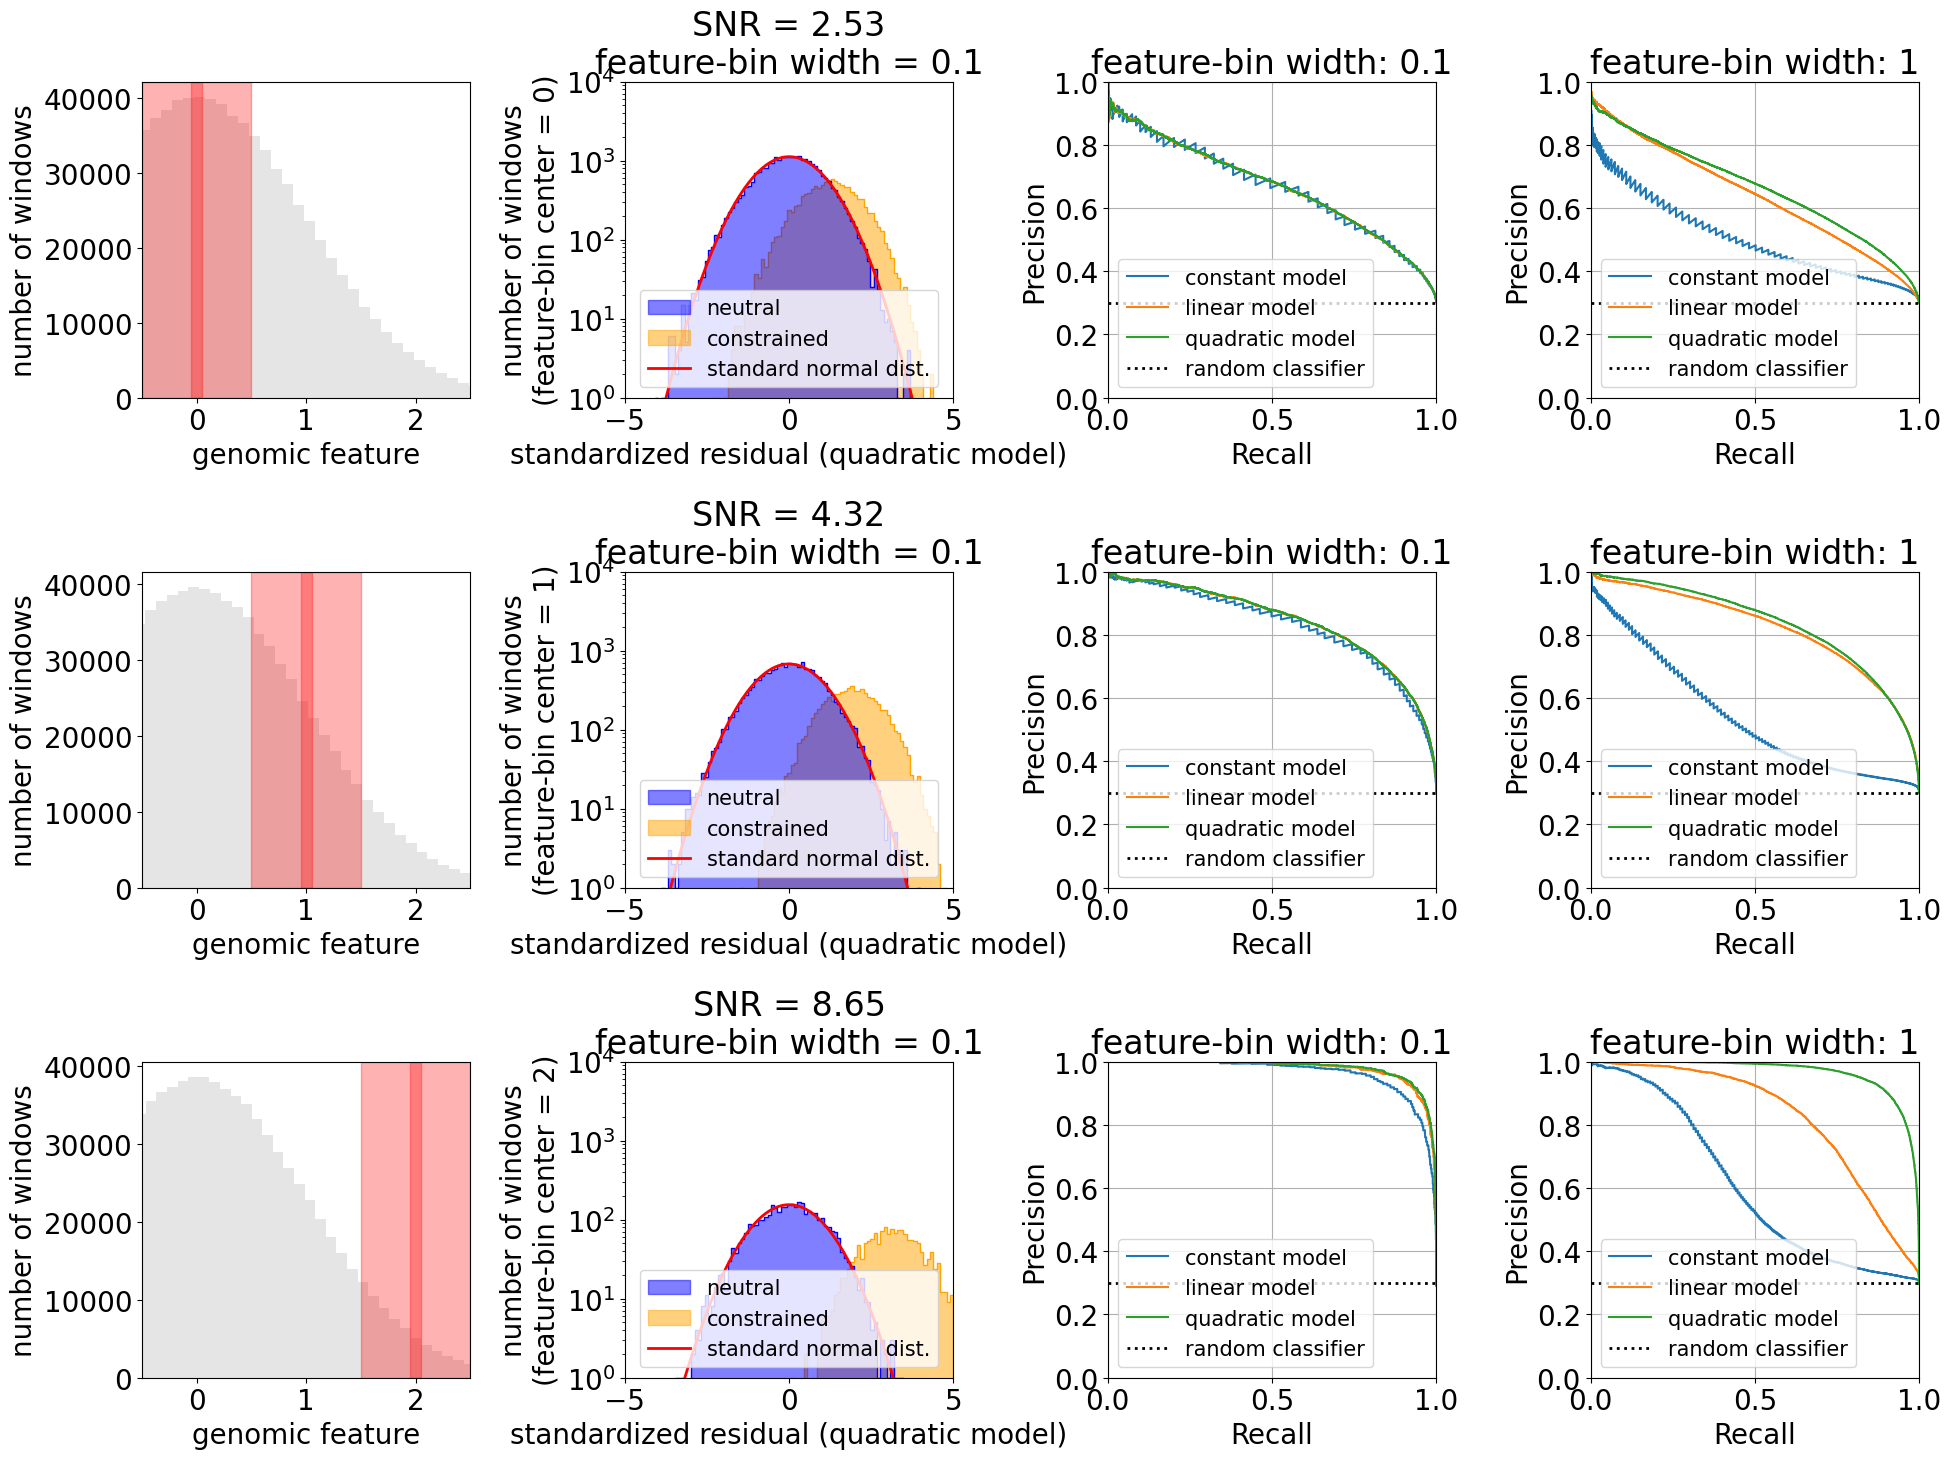

In [7]:
plot_pr_curve_wrapper(DATA, MODEL_TYPES, POSITIVE_FRACTION, xlim_residual=(-5, 5), ylim_residual=(1, 1e4), standardized=True, number_examples=NUMBER_EXAMPLES, bin_widths=[0.1, 1])

## Model bias is responsible for poor genome-wide performance 

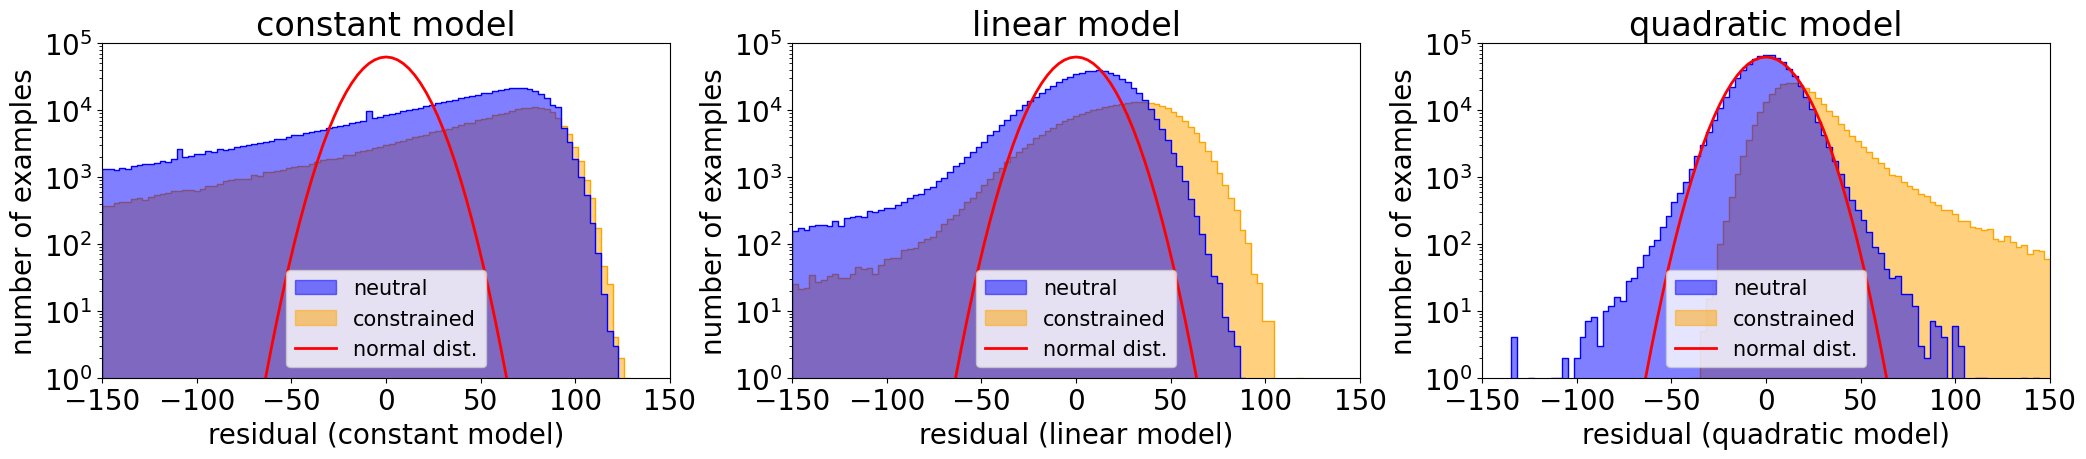

In [8]:
from predict_constraint import plot_residual_distributions_all_models

plot_residual_distributions_all_models(DATA, standardized=False, xlim=(-150, 150), model_types=MODEL_TYPES)

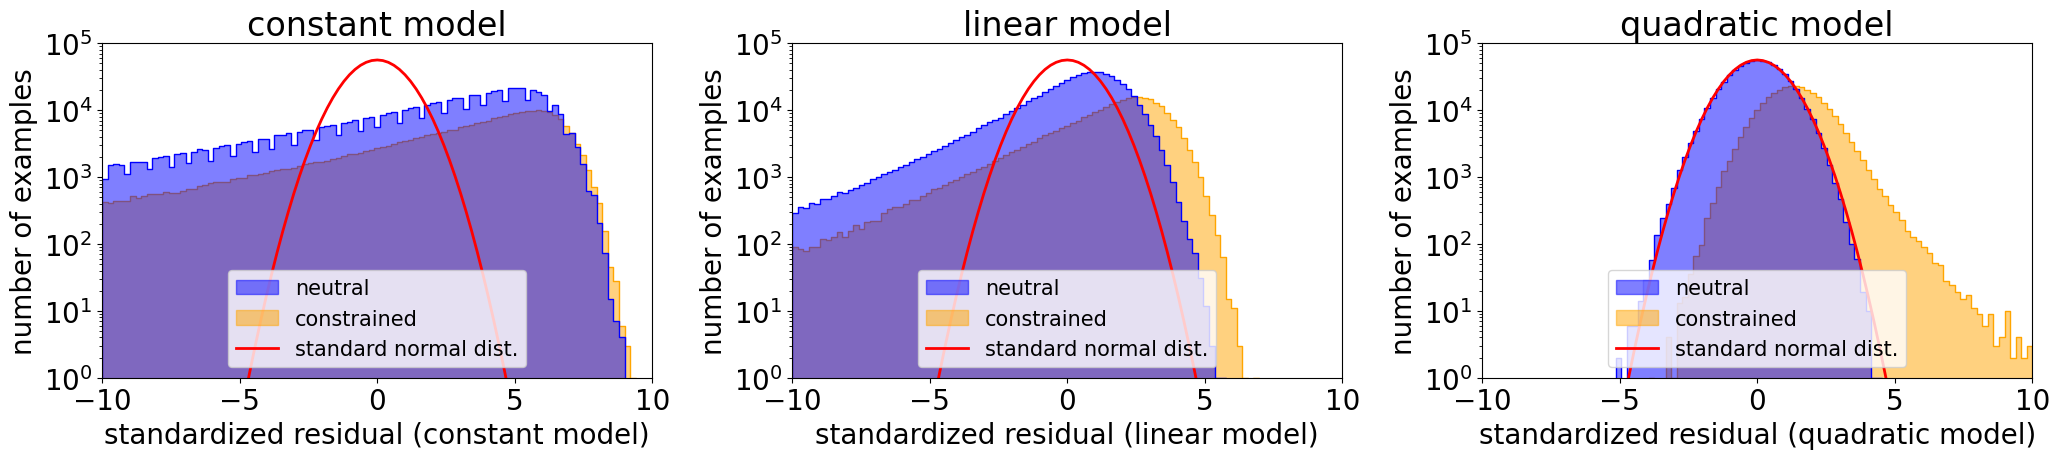

In [9]:
plot_residual_distributions_all_models(DATA, standardized=True, xlim=(-10, 10), model_types=MODEL_TYPES)

## How observed and expected SNV counts depend on standardized residuals

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


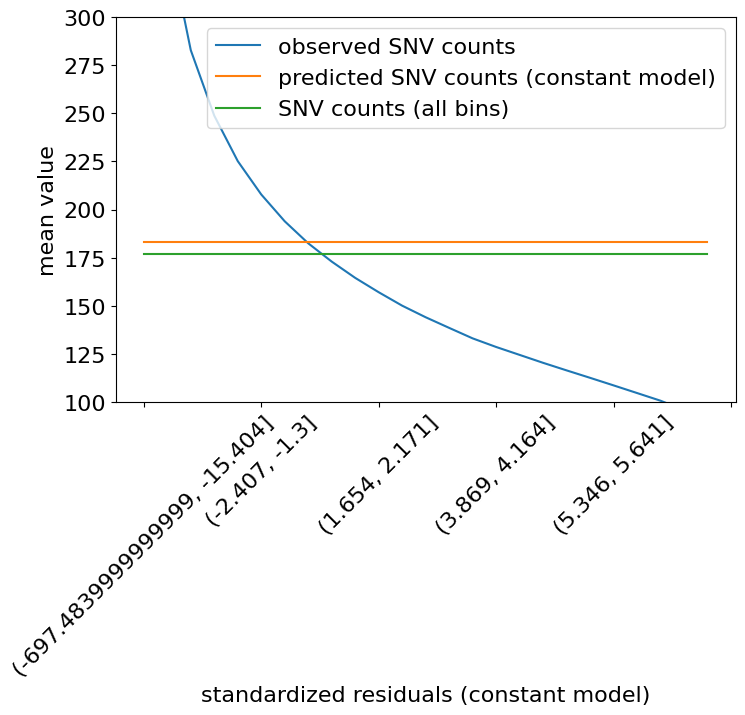

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


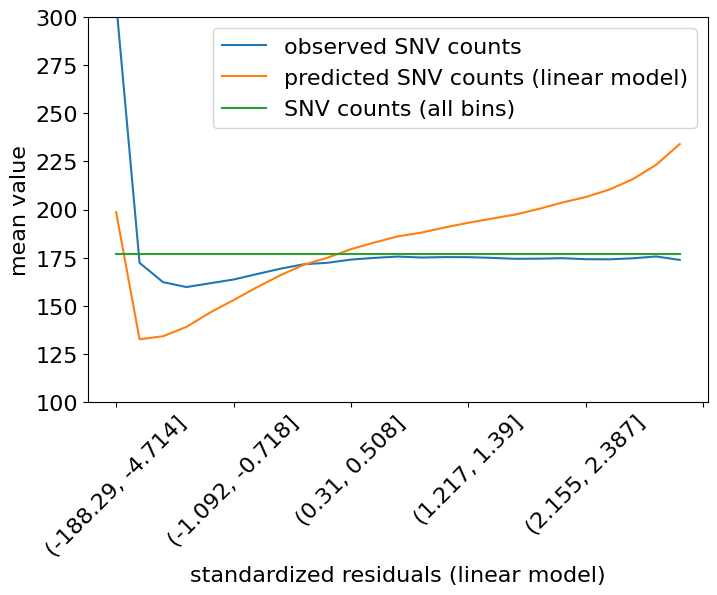

/scratch/ucgd/lustre-labs/quinlan/u6018199/constraint-tools/papers/neutral_models_are_biased/9.regression/snv_counts_vs_residuals.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(f'standardized residuals bin ({model_type} model)')


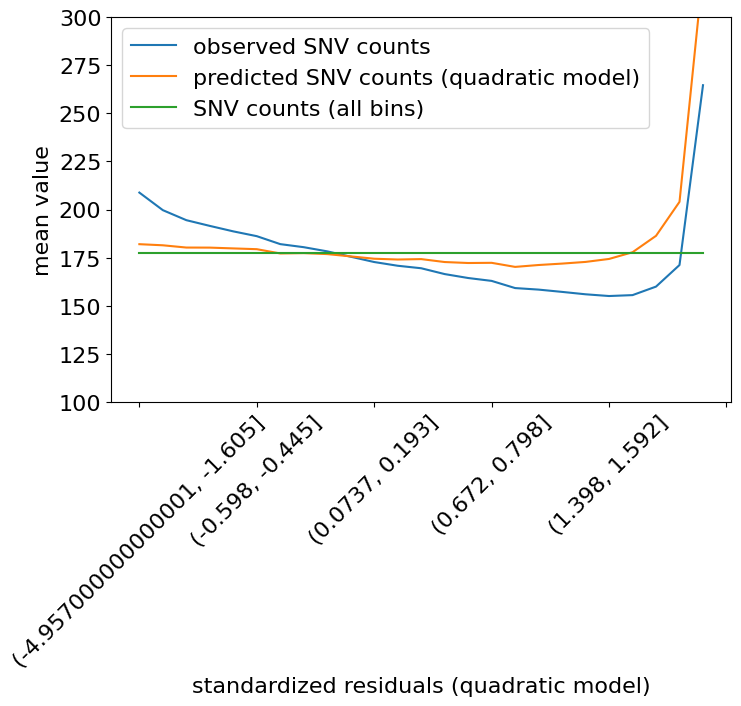

In [10]:
from snv_counts_vs_residuals import plot_snv_counts_vs_residuals_all_models

plt.rcParams.update({'font.size': 16})

plot_snv_counts_vs_residuals_all_models(DATA, MODEL_TYPES)

## How observed and expected SNV counts depend on z-scores in real experimental data

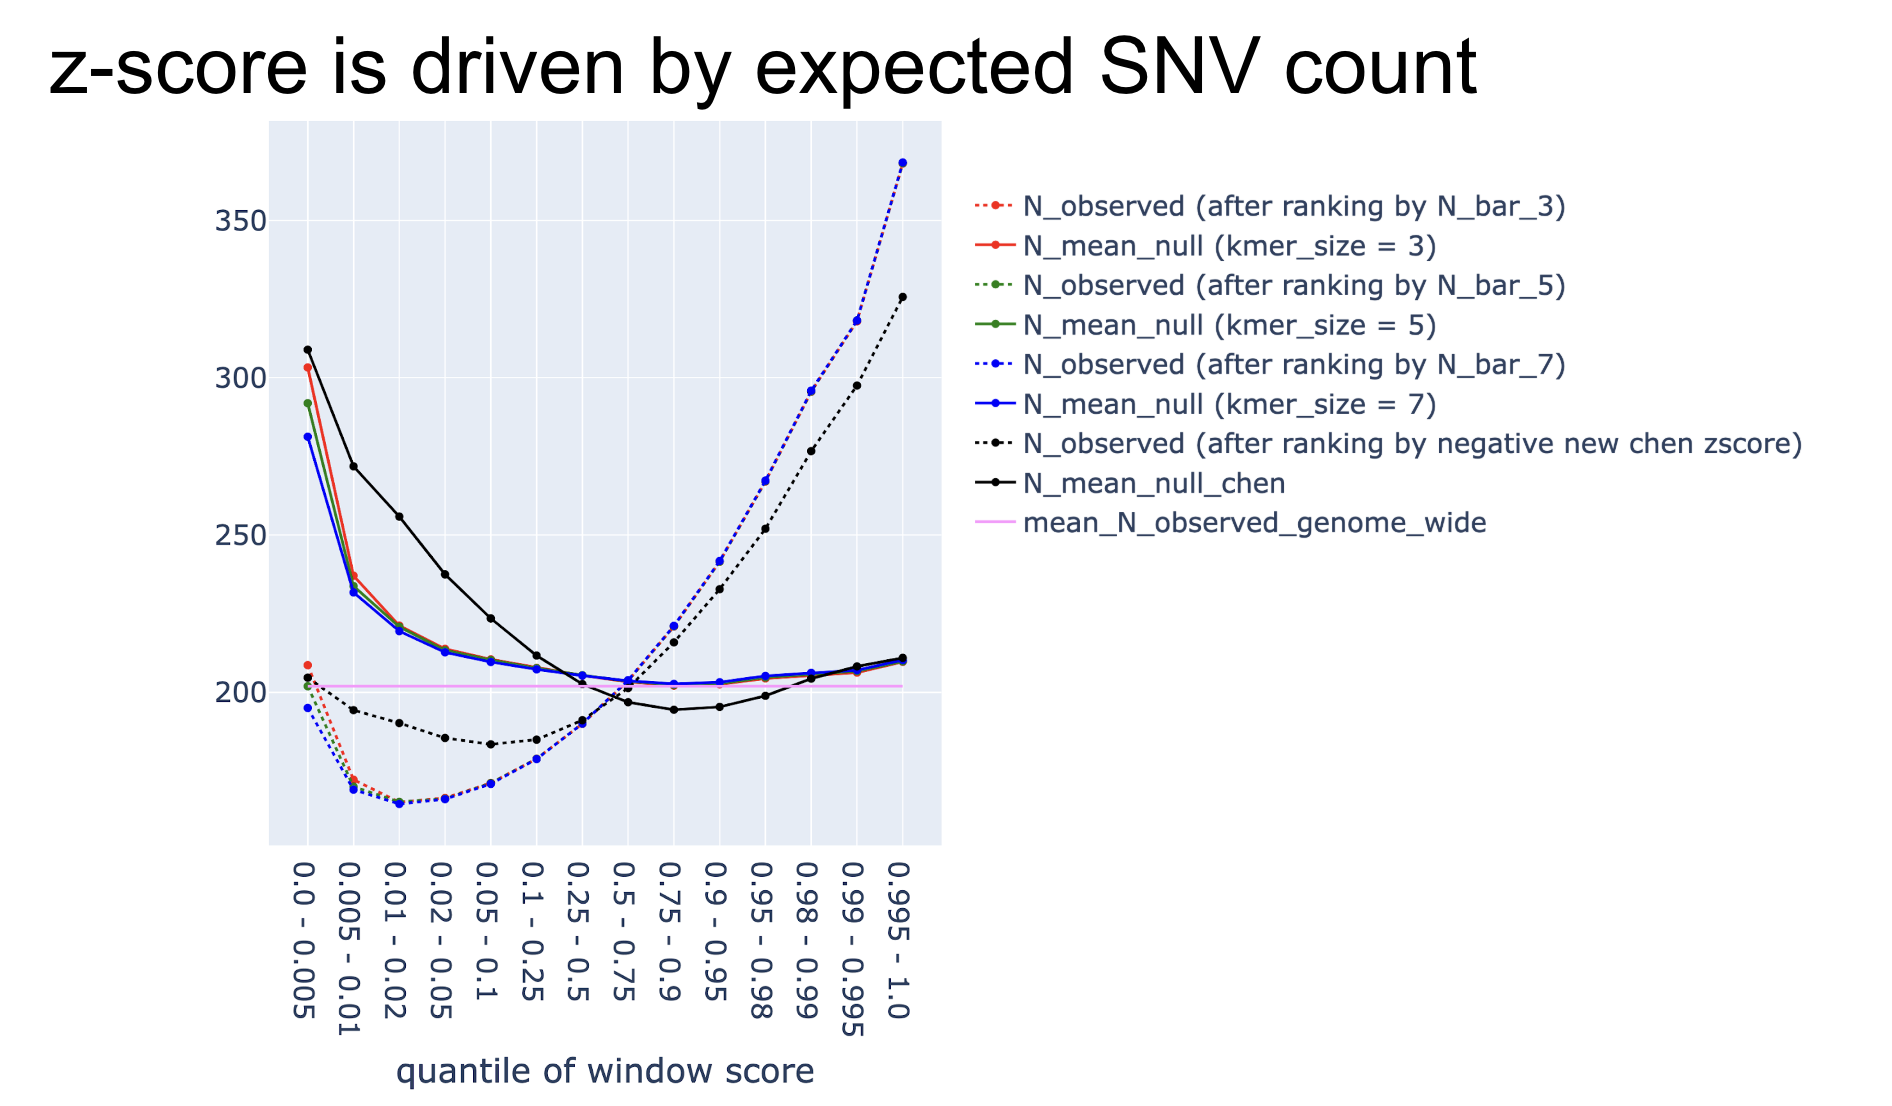

In [11]:
from IPython.display import Image

# smaller z-score is more constrained in the plot below 
# source: https://docs.google.com/presentation/d/1QyoCJSHlWG4FqyFuJ-mO7U-R0cqsIq5GhYjReAO1s60/edit#slide=id.g2257848117b_0_175
Image(filename='SNV-counts-vs-zscores.png', width=800)